# Evaluate Experiments on single reseller segment
1. tld-reseller-segmented glm
2. reseller-segmented glm
4. reseller-segmented rf (w/ respect.unordered.factors=FALSE)
5. agg glm (agg_glm_basic_model)

In [1]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [2]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
library(rPython)
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)
library(dominanceanalysis)

getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/local/Domains_202003/scripts/phaseII_05_moredata"

In [3]:
load('../../data/agg_glm_basic_model')

In [160]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')

# source('../phaseII_03_forest/load_prep_data_expiry.R')

# expiry_train_prepped_2_1 (list, less df's w/ 0 obs)
# expiry_test_prepped_2_1  (list, less df's w/ 0 obs)
# expiry_train_df_1 (above, rbound)
# expiry_test_df_1 (above, rbound)
# expiry_train_df_sub (subset vars)                                        
# expiry_test_df_sub (subset vars)

In [12]:
count_pct <- function(df) {
  return(
    df %>%
      tally %>% 
      mutate(n_prp = n/sum(n))
  )
}



expiry_train_df_sub %>% 
    group_by(reseller) %>% 
    count_pct %>%
    arrange(desc(n)) %>% 
    head(50)



reseller,n,n_prp
<chr>,<int>,<dbl>
namecheap,221470,0.186383337
alibaba,123060,0.103564065
gmo,115069,0.096839049
go daddy,108988,0.091721439
reg.ru,61355,0.051634757
chengdu west,55831,0.046985904
gandi sas,46986,0.039542184
hostinger,39937,0.033609931
uniregistrar,28027,0.023586787


In [41]:
expiry_train_df_sub %>% 
    group_by(reseller) %>% 
    count_pct %>%
    arrange(desc(n)) %>% 
    head(50) %>% 
    pull(reseller)

[1] "namecheap"                 "alibaba"                  
 [3] "gmo"                       "go daddy"                 
 [5] "reg.ru"                    "chengdu west"             
 [7] "gandi sas"                 "hostinger"                
 [9] "uniregistrar"              "zhengzhou century connect"
[11] "onlinenic"                 "fbs"                      
[13] "dynadot"                   "url solutions"            
[15] "pdr ltd"                   "network solutions"        
[17] "bigrock"                   "1&1 internet"             
[19] "ovh"                       "hostgator"                
[21] "bluehost"                  "register.it"              
[23] "shopify"                   "pdr china"                
[25] "versio"                    "namesilo"                 
[27] "beget"                     "dotserve inc"             
[29] "wix"                       "west263 international"    
[31] "domains4bitcoins"          "hosting ukraine"          
[33] "whois"                     "domain.com - registrar"   
[35] "value domain"              "niaga hoster"             
[37] "tenten"                    "nics telekom"             
[39] "tucows"                    "uol"                      
[41] "cronon ag"                 "soluciones corporativas"  
[43] "name.com"                  "google"                   
[45] "ru-center"                 "shanghai meicheng"        
[47] "sered"                     "muumuu"                   
[49] "eranet"                    "xin net"

# Load Script Results & Analyze

In [18]:
load("../../data/reseller_compare_list_11_50")
reseller_compare_list_11_50 <- reseller_compare_list_01_10
load("../../data/reseller_compare_list_01_10")

In [20]:
length(reseller_compare_list_01_10)
length(reseller_compare_list_11_50)

[1] 10

[1] 40

In [21]:
reseller_compare_list_01_50 <- append(reseller_compare_list_01_10, 
                                      reseller_compare_list_11_50)

In [22]:
length(reseller_compare_list_01_50)

[1] 50

In [23]:
reseller_compare_list_01_50[1]

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,1191,0.3578726,3.578726
0.2,1740,0.5228365,2.614183
0.3,2183,0.6559495,2.186498
0.4,2518,0.7566106,1.891526
0.5,2797,0.8404447,1.680889
0.6,3029,0.9101562,1.516927
0.7,3180,0.9555288,1.365041
0.8,3252,0.9771635,1.221454
0.9,3295,0.9900841,1.100093


In [24]:
names(reseller_compare_list_01_10[[1]])

[1] "lift_df_seg_glm"        "lift_df_agg_glm"        "lift_df_ranger_03_fact"

In [29]:
i=1
reseller_compare_list_01_10[[i]][['lift_df_seg_glm']]
reseller_compare_list_01_10[[i]][['lift_df_seg_glm']][1,'lift']
calc_auc(reseller_compare_list_01_10[[i]][['lift_df_seg_glm']])

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,1191,0.3578726,3.578726
0.2,1740,0.5228365,2.614183
0.3,2183,0.6559495,2.186498
0.4,2518,0.7566106,1.891526
0.5,2797,0.8404447,1.680889
0.6,3029,0.9101562,1.516927
0.7,3180,0.9555288,1.365041
0.8,3252,0.9771635,1.221454
0.9,3295,0.9900841,1.100093


[1] 3.578726

[1] 0.7466647

## for each list elem (each reseller), extract:
 - lift@10% 
 - auc

In [42]:
reseller_names = expiry_train_df_sub %>% 
    group_by(reseller) %>% 
    count_pct %>%
    arrange(desc(n)) %>% 
    head(50) %>% 
    pull(reseller)

In [91]:
ren_prp = expiry_train_df_sub %>% 
    group_by(reseller) %>% 
    summarise(n = n(), ren_prp = sum(renewal_status=='Renewed')/sum(n))  %>% 
    arrange(desc(n)) %>% 
    head(50) %>% 
    pull(ren_prp)

`summarise()` ungrouping output (override with `.groups` argument)



In [92]:
tld_rat = expiry_train_df_sub %>%
    group_by(reseller) %>% 
    summarise(n = n(), tld_cnt = n_distinct(tld), tld_rat = tld_cnt/n) %>% 
    arrange(desc(n)) %>%
    head(50) %>% 
    pull(tld_rat)

`summarise()` ungrouping output (override with `.groups` argument)



In [144]:
reseller_country_maj = expiry_train_df_sub %>%
  add_count(reseller, reseller_country) %>%
  group_by(reseller) %>%
  mutate(reseller_country_maj = reseller_country[n == max(n)][1]) %>%
  select(-n) %>% 
  group_by(reseller,reseller_country_maj) %>%
    summarise(n = n()) %>% 
    arrange(desc(n)) %>%
    head(50) %>% 
    pull(reseller_country_maj)

`summarise()` regrouping output by 'reseller' (override with `.groups` argument)



In [145]:
region_maj = expiry_train_df_sub %>%
  add_count(reseller, region) %>%
  group_by(reseller) %>%
  mutate(region_maj = region[n == max(n)][1]) %>%
  select(-n) %>% 
  group_by(reseller,region_maj) %>%
    summarise(n = n()) %>% 
    arrange(desc(n)) %>%
    head(50) %>% 
    pull(region_maj)

`summarise()` regrouping output by 'reseller' (override with `.groups` argument)



In [63]:
head(expiry_train_df_sub)

renewal_status,tld,reseller,reseller_country,region,reg_period,sld_type,sld_length,day_domains,gibb_score,pattern_domain_count,reg_arpt
<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>
Renewed,fun,1&1 internet,Germany,Non China,1,l,7,1,6.77,1,15
Renewed,fun,1&1 internet,Germany,Non China,1,ln,7,1,8.65,1,15
Renewed,fun,1&1 internet,Germany,Non China,1,l,6,1,13.09,1,15
Not Renewd,fun,1&1 internet,Germany,Non China,1,l,12,1,2.44,1,15
Renewed,fun,1&1 internet,Germany,Non China,1,l,7,1,2.34,1,15
Renewed,fun,1&1 internet,Germany,Non China,1,l,8,1,3.64,1,15


In [146]:
compare_df <- matrix(ncol=6, nrow=length(reseller_compare_list_01_50))

for (i in seq(length(reseller_compare_list_01_50))){
    
    # lift@10% 
    seg2_glm_lift10 = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']][1,'lift']
    seg_glm_lift10 = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']][1,'lift']
    seg_rf_lift10 = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']][1,'lift']
    
    # auc
    seg2_glm_auc = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']])
    seg_glm_auc = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']])
    seg_rf_auc = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])
    
    
    compare_df[i,] <- c(seg2_glm_lift10, seg_glm_lift10, seg_rf_lift10, 
                       seg2_glm_auc, seg_glm_auc, seg_rf_auc)

}

compare_df <- data.frame(compare_df)
names(compare_df) <- c('seg2_glm_lift10', 'seg_glm_lift10', 'seg_rf_lift10', 
                       'seg2_glm_auc', 'seg_glm_auc', 'seg_rf_auc')

compare_df <- compare_df %>% 
    mutate(reseller = reseller_names,
           count = count_obs,
           ren_prp = ren_prp,
           tld_rat = tld_rat,
           reseller_country_maj = reseller_country_maj,
           region_maj = region_maj,
           lift10_rat = seg_rf_lift10/seg2_glm_lift10,
           auc_rat = seg_rf_auc/seg2_glm_auc,
           lift10_win = lift10_rat>1,
           auc_win = auc_rat>1)


In [147]:
compare_df %>%
    arrange(desc(auc_rat)) %>% 
    head(10)

,seg2_glm_lift10,seg_glm_lift10,seg_rf_lift10,seg2_glm_auc,seg_glm_auc,seg_rf_auc,reseller,count,ren_prp,tld_rat,reseller_country_maj,region_maj,lift10_rat,auc_rat,lift10_win,auc_win
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
1,0.000000,0.000000,10.000000,0.0500000,0.0500000,0.9500000,zhengzhou century connect,27066,0.000406414,0.0003325205,China,China,Inf,19.000000,TRUE,TRUE
2,5.000000,5.000000,10.000000,0.7750000,0.6250000,0.9500000,eranet,2756,0.005442671,0.0036284470,China,China,2.0000000,1.225806,TRUE,TRUE
3,3.911111,4.622222,4.044444,0.6642222,0.7824444,0.7815556,dotserve inc,5552,0.167146974,0.0016210375,United States,Non China,1.0340909,1.176648,TRUE,TRUE
4,4.090909,6.363636,7.727273,0.7909091,0.9045455,0.9136364,shanghai meicheng,2868,0.022663877,0.0034867503,China,China,1.8888889,1.155172,TRUE,TRUE
5,4.444444,3.333333,1.111111,0.6500000,0.7611111,0.7500000,tenten,4047,0.012354831,0.0017296763,Vietnam,Non China,0.2500000,1.153846,FALSE,TRUE
6,6.071429,8.214286,8.214286,0.8142857,0.8964286,0.9000000,pdr china,6387,0.011116330,0.0010959762,China,Non China,1.3529412,1.105263,TRUE,TRUE
7,1.244240,1.382488,1.566820,0.5177419,0.5417051,0.5546083,shopify,6678,0.134770889,0.0011979635,Canada,Non China,1.2592593,1.071206,TRUE,TRUE
8,3.707865,3.033708,3.258427,0.7657303,0.8028090,0.8185393,whois,4990,0.072945892,0.0022044088,United States,Non China,0.8787879,1.068966,FALSE,TRUE
9,3.000000,3.333333,3.500000,0.6616667,0.6816667,0.7000000,uol,3731,0.074242830,0.0021441973,Brazil,Non China,1.1666667,1.057935,TRUE,TRUE


### Compare observation counts

`summarise()` ungrouping output (override with `.groups` argument)



auc_win,min,med,mean,max
<lgl>,<int>,<dbl>,<dbl>,<int>
FALSE,3335,7276.5,24987.67,221470
TRUE,2703,5468.0,20593.31,123060


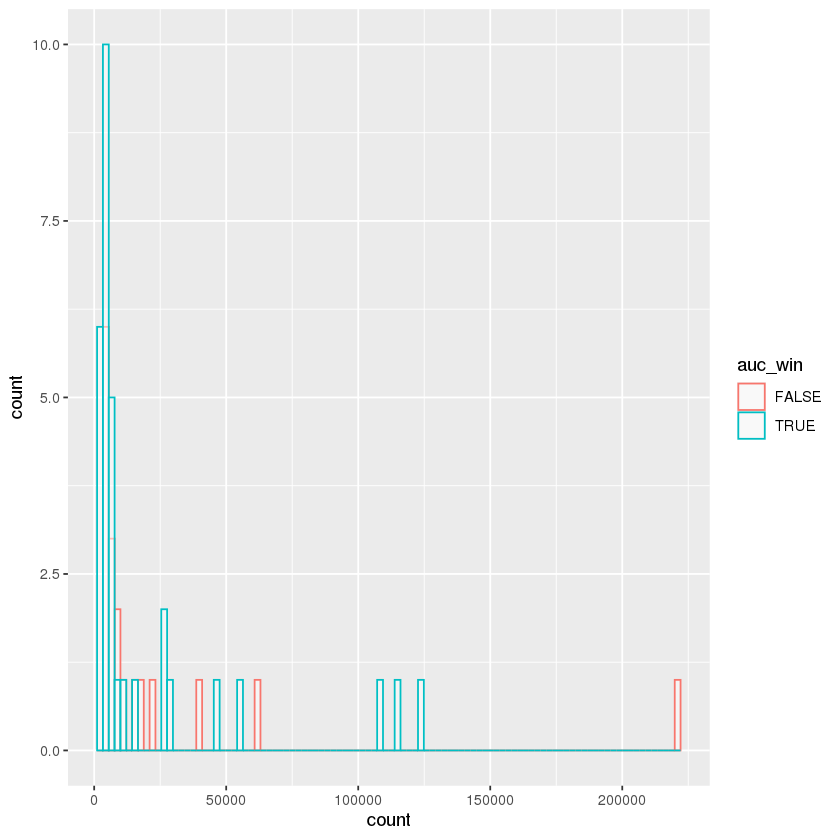

In [95]:
# reseller-seg rf wins over (AUC) reseller-tld-seg glm for segments with smaller observation counts

compare_df %>% 
    group_by(auc_win) %>%
    summarise( min = min(count),
               med = quantile(count, .5),
               mean = mean(count),
               max = max(count))

ggplot(compare_df, aes(x=count, color=auc_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 100)

`summarise()` ungrouping output (override with `.groups` argument)



lift10_win,min,med,mean,max
<lgl>,<int>,<dbl>,<dbl>,<int>
FALSE,2703,6027,25145.44,221470
TRUE,2756,6387,19205.12,115069


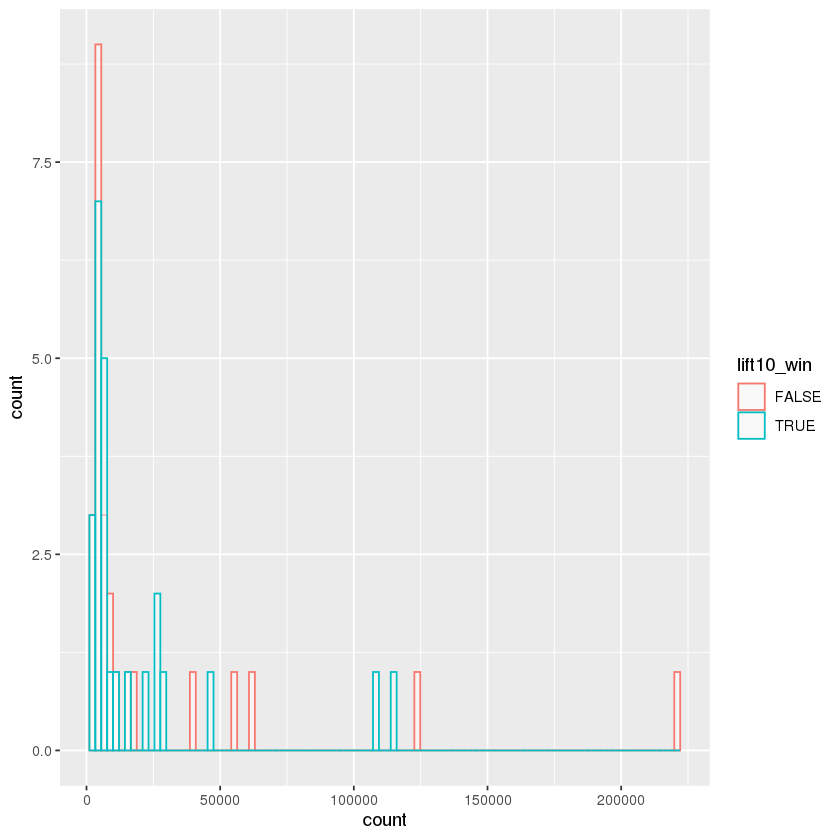

In [96]:
# no clear conclusion regarding lift@10%
compare_df %>% 
    group_by(lift10_win) %>%
    summarise( min = min(count),
               med = quantile(count, .5),
               mean = mean(count),
               max = max(count))

ggplot(compare_df, aes(x=count, color=lift10_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 100)

### Compare proportion of renewals

`summarise()` ungrouping output (override with `.groups` argument)



auc_win,min,med,mean,max
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.008365019,0.08007424,0.1587916,0.4622367
TRUE,0.000406414,0.07214640,0.1456023,0.5650905


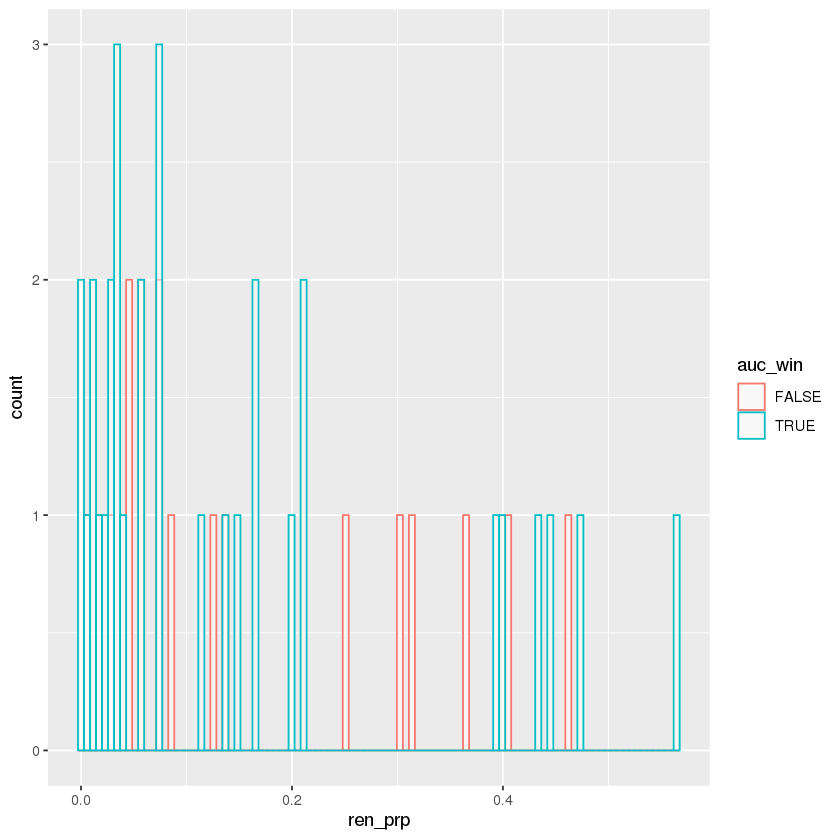

In [99]:
# in general, rf works well for very small renewal probabilities (very unbalanced)

compare_df %>% 
    group_by(auc_win) %>%
    summarise( min = min(ren_prp),
               med = quantile(ren_prp, .5),
               mean = mean(ren_prp),
               max = max(ren_prp))

ggplot(compare_df, aes(x=ren_prp, color=auc_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 100)

`summarise()` ungrouping output (override with `.groups` argument)



lift10_win,min,med,mean,max
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.008365019,0.07294589,0.1263721,0.3977486
TRUE,0.000406414,0.07424283,0.1743289,0.5650905


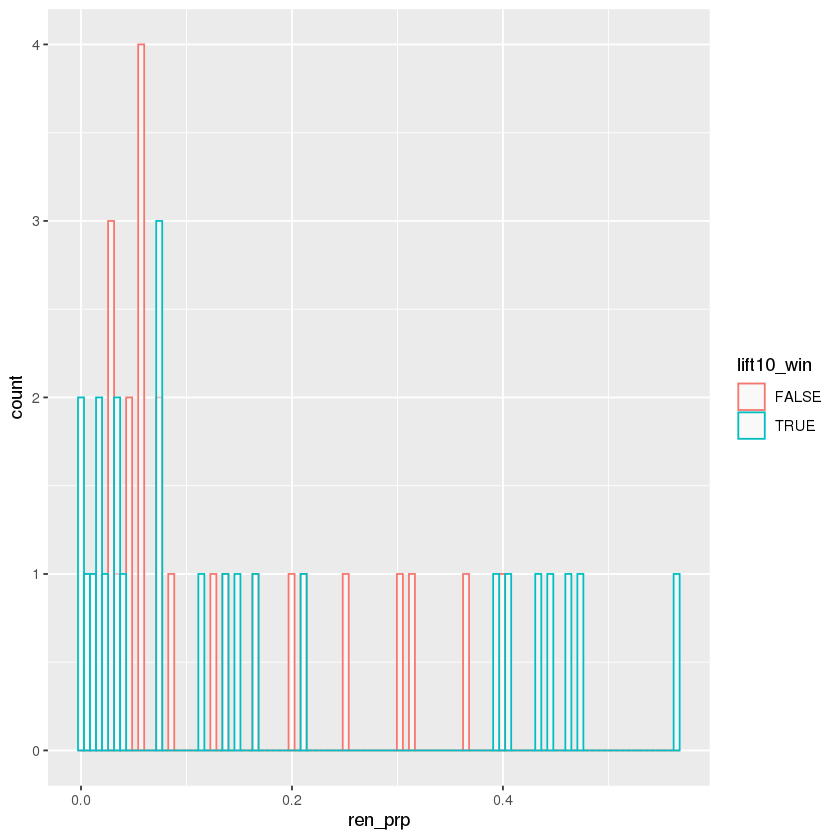

In [100]:
# same conclusion regarding lift@10%
compare_df %>% 
    group_by(lift10_win) %>%
    summarise( min = min(ren_prp),
               med = quantile(ren_prp, .5),
               mean = mean(ren_prp),
               max = max(ren_prp))

ggplot(compare_df, aes(x=ren_prp, color=lift10_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 100)

### Compare tld count as a ratio of total number of obs

`summarise()` ungrouping output (override with `.groups` argument)



auc_win,min,med,mean,max
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,4.966813e-05,0.001118583,0.001238123,0.002998501
TRUE,6.500894e-05,0.001652472,0.001594123,0.003699593


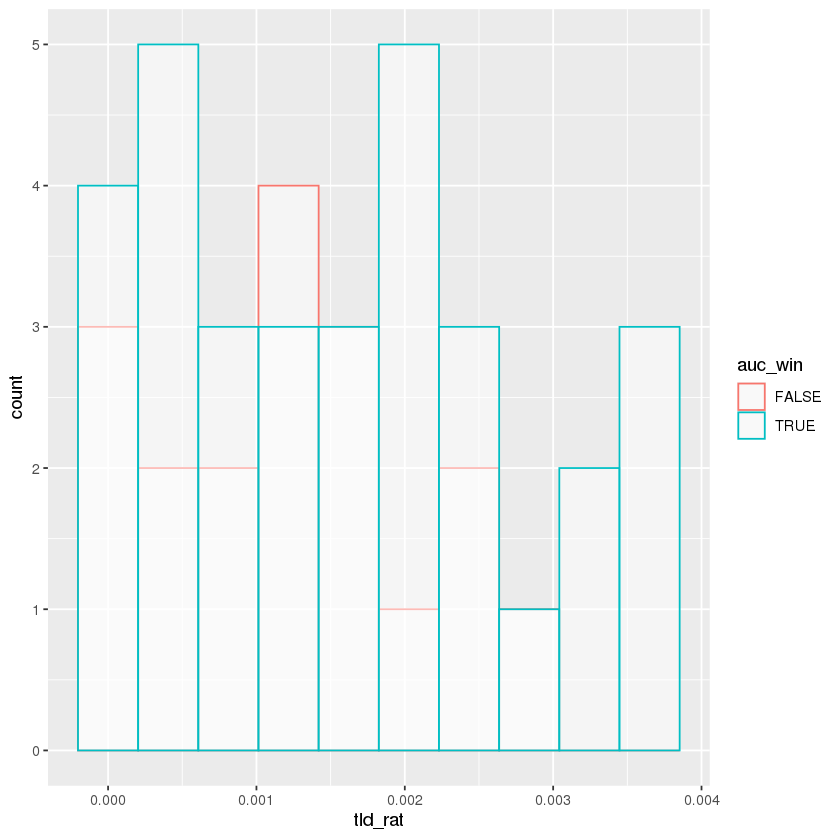

In [102]:
# in general, rf works well for very small renewal probabilities (very unbalanced)

compare_df %>% 
    group_by(auc_win) %>%
    summarise( min = min(tld_rat),
               med = quantile(tld_rat, .5),
               mean = mean(tld_rat),
               max = max(tld_rat))

ggplot(compare_df, aes(x=tld_rat, color=auc_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 10)

`summarise()` ungrouping output (override with `.groups` argument)



lift10_win,min,med,mean,max
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,4.966813e-05,0.001559252,0.001459119,0.003699593
TRUE,9.175322e-05,0.001197963,0.001472806,0.003628447


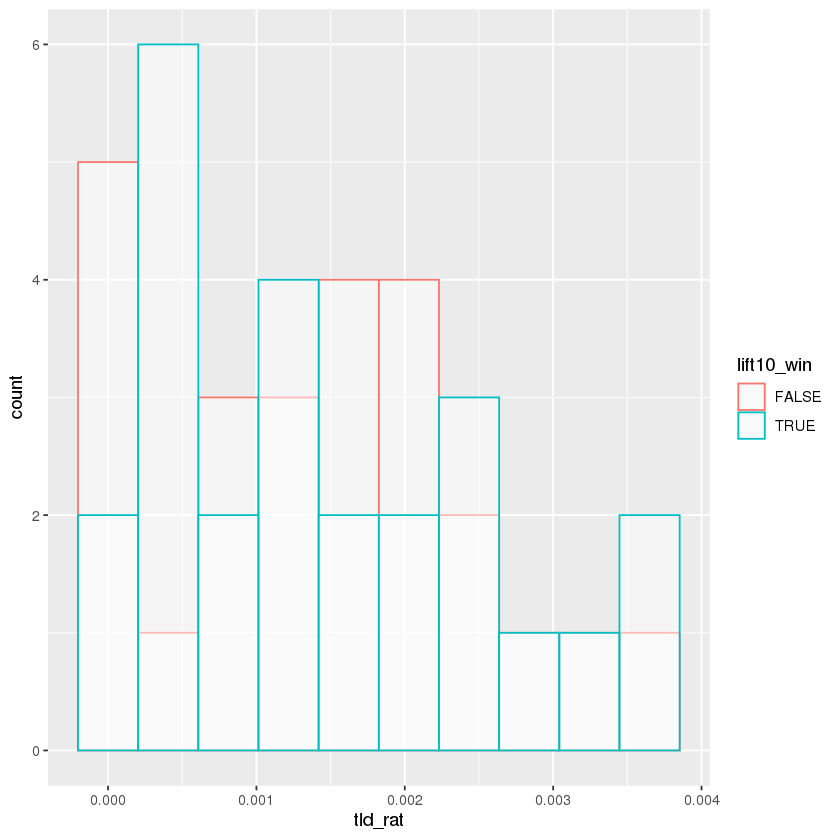

In [104]:
# same conclusion regarding lift@10%
compare_df %>% 
    group_by(lift10_win) %>%
    summarise( min = min(tld_rat),
               med = quantile(tld_rat, .5),
               mean = mean(tld_rat),
               max = max(tld_rat))

ggplot(compare_df, aes(x=tld_rat, color=lift10_win)) +
  geom_histogram(fill="white", alpha=0.5, position="identity", bins = 10)

### Compare reseller_country 
(note, some resellers have more than 1 country, so we  we take the majority)

In [129]:
compare_df %>% 
    filter(auc_win==FALSE) %>% 
    group_by(reseller_country_maj) %>%
    tally() %>%
    arrange(desc(n))


compare_df %>% 
    filter(auc_win==TRUE) %>% 
    group_by(reseller_country_maj) %>%
    tally() %>%
    arrange(desc(n))

reseller_country_maj,n
<chr>,<int>
United States,7
India,2
Russia,2
Turkey,2
France,1
Italy,1
Lithuania,1
Southafrica,1
Spain,1


reseller_country_maj,n
<chr>,<int>
China,8
United States,8
Japan,3
Germany,2
Brazil,1
Canada,1
Cayman Islands,1
Cyprus,1
France,1


In [149]:
compare_df %>% 
    filter(lift10_win==FALSE) %>% 
    group_by(reseller_country_maj) %>%
    tally() %>%
    arrange(desc(n))


compare_df %>% 
    filter(lift10_win==TRUE) %>% 
    group_by(reseller_country_maj) %>%
    tally() %>%
    arrange(desc(n))

reseller_country_maj,n
<chr>,<int>
United States,8
China,3
India,2
Russia,2
Spain,2
France,1
Indonesia,1
Italy,1
Lithuania,1


reseller_country_maj,n
<chr>,<int>
United States,7
China,5
Japan,3
Germany,2
Brazil,1
Canada,1
Cayman Islands,1
Cyprus,1
France,1


### Compare region (to confirm China finding above)
(note, some resellers have more than 1 country, so we  we take the majority)

In [150]:
compare_df %>% 
    filter(auc_win==FALSE) %>% 
    group_by(region_maj) %>%
    tally() %>%
    arrange(desc(n))


compare_df %>% 
    filter(auc_win==TRUE) %>% 
    group_by(region_maj) %>%
    tally() %>%
    arrange(desc(n))

region_maj,n
<chr>,<int>
Non China,18


region_maj,n
<chr>,<int>
Non China,25
China,7


In [151]:
compare_df %>% 
    filter(lift10_win==FALSE) %>% 
    group_by(region_maj) %>%
    tally() %>%
    arrange(desc(n))


compare_df %>% 
    filter(lift10_win==TRUE) %>% 
    group_by(region_maj) %>%
    tally() %>%
    arrange(desc(n))

region_maj,n
<chr>,<int>
Non China,22
China,3


region_maj,n
<chr>,<int>
Non China,21
China,4


# Examine China region graphs specifically

In [152]:
compare_df %>% 
    filter(region_maj=='China') 

seg2_glm_lift10,seg_glm_lift10,seg_rf_lift10,seg2_glm_auc,seg_glm_auc,seg_rf_auc,reseller,count,ren_prp,tld_rat,reseller_country_maj,region_maj,lift10_rat,auc_rat,lift10_win,auc_win
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
4.924670,4.453861,4.576271,0.8391714,0.8303202,0.8568738,alibaba,123060,0.035470502,6.500894e-05,China,China,0.9292543,1.021095,FALSE,TRUE
7.366947,7.114846,6.974790,0.8973389,0.8956583,0.9054622,chengdu west,55831,0.025720478,1.791120e-04,China,China,0.9467681,1.009053,FALSE,TRUE
0.000000,0.000000,10.000000,0.0500000,0.0500000,0.9500000,zhengzhou century connect,27066,0.000406414,3.325205e-04,China,China,Inf,19.000000,TRUE,TRUE
1.910112,1.797753,2.191011,0.7398876,0.7387640,0.7528090,west263 international,5384,0.116456166,1.857355e-03,China,China,1.1470588,1.017464,TRUE,TRUE
4.090909,6.363636,7.727273,0.7909091,0.9045455,0.9136364,shanghai meicheng,2868,0.022663877,3.486750e-03,China,China,1.8888889,1.155172,TRUE,TRUE
5.000000,5.000000,10.000000,0.7750000,0.6250000,0.9500000,eranet,2756,0.005442671,3.628447e-03,China,China,2.0000000,1.225806,TRUE,TRUE
2.439024,3.658537,2.195122,0.6182927,0.6987805,0.6280488,xin net,2703,0.054753977,3.699593e-03,China,China,0.9000000,1.015779,FALSE,TRUE


In [159]:
resellers_China = compare_df %>% 
    mutate(index = row_number()) %>% 
    filter(region_maj=='China')  %>% 
    pull(reseller)

resellers_China_idx = compare_df %>% 
    mutate(index = row_number()) %>% 
    filter(region_maj=='China')  %>% 
    pull(index)

resellers_China
resellers_China_idx

[1] "alibaba"                   "chengdu west"             
[3] "zhengzhou century connect" "west263 international"    
[5] "shanghai meicheng"         "eranet"                   
[7] "xin net"

[1]  2  6 10 30 46 49 50

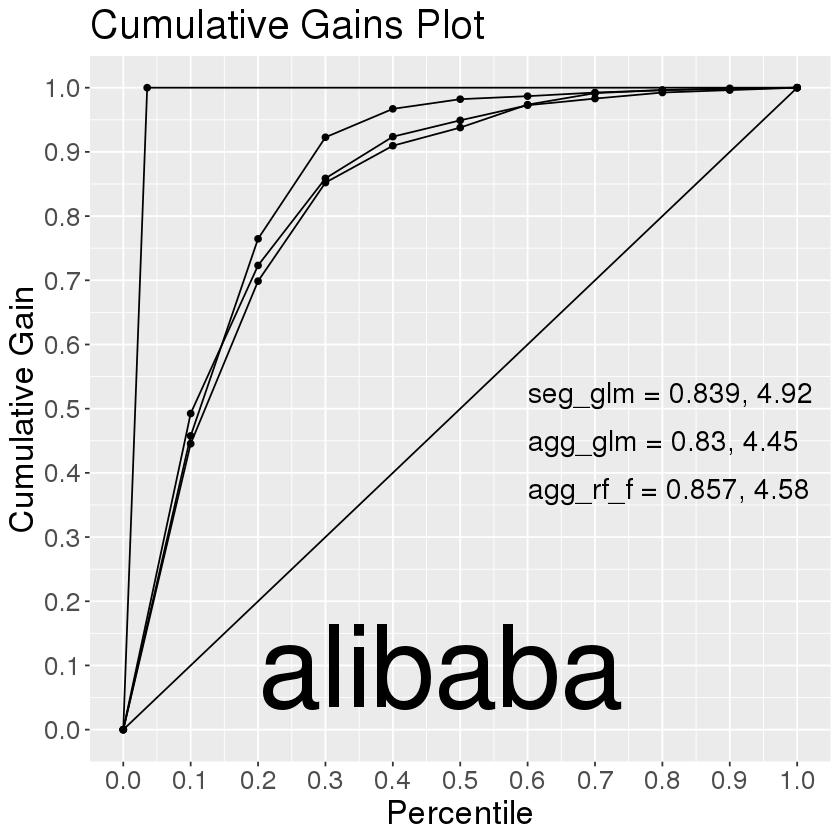

In [161]:
idx=1
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


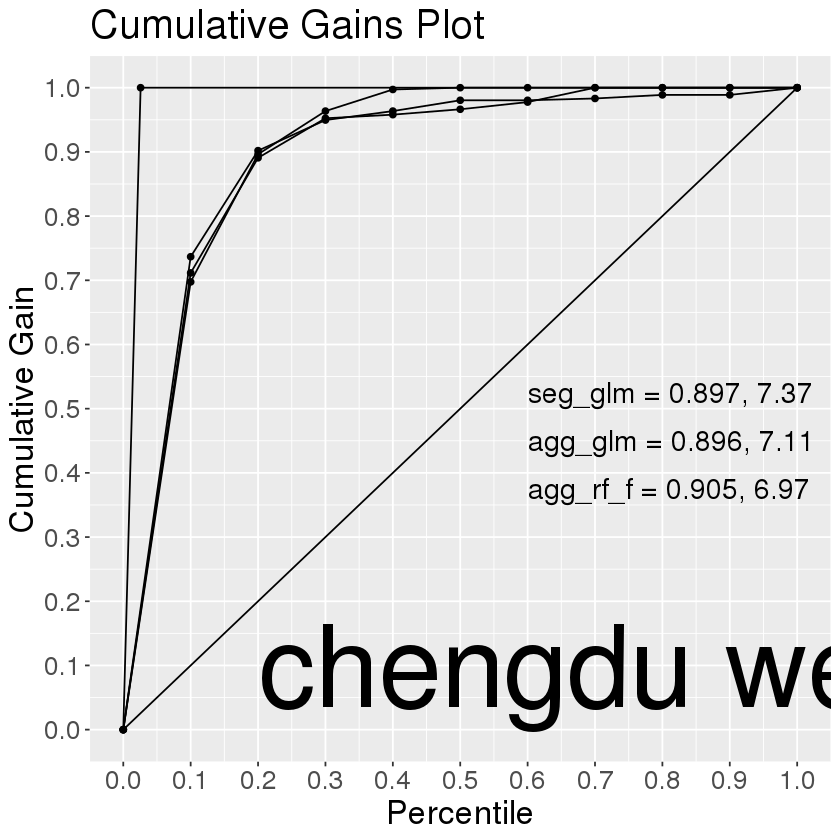

In [166]:
idx=2
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


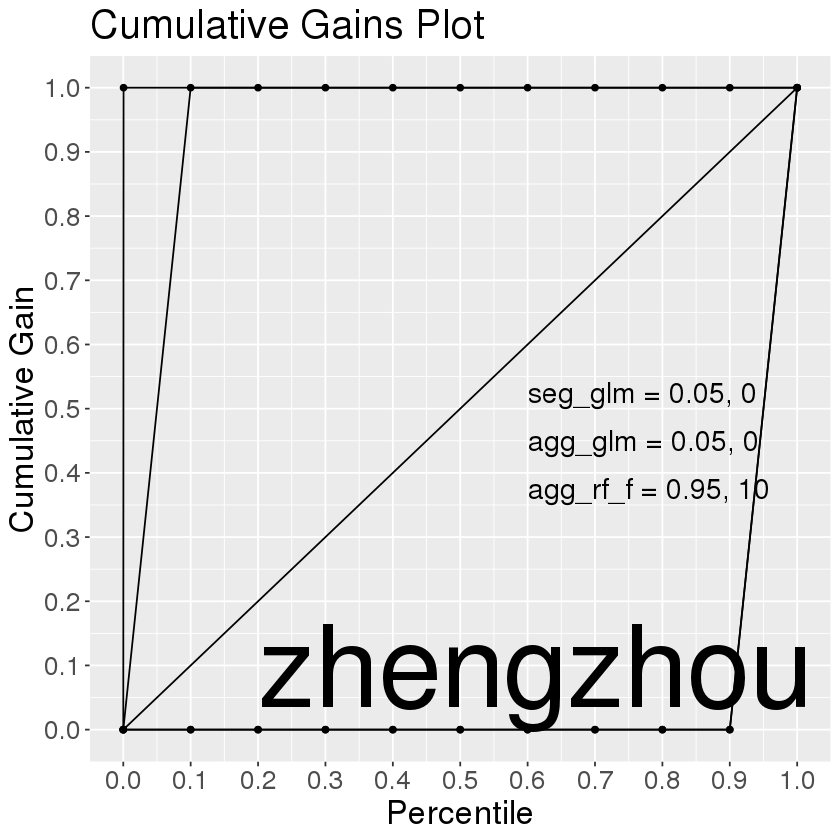

In [167]:
idx=3
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


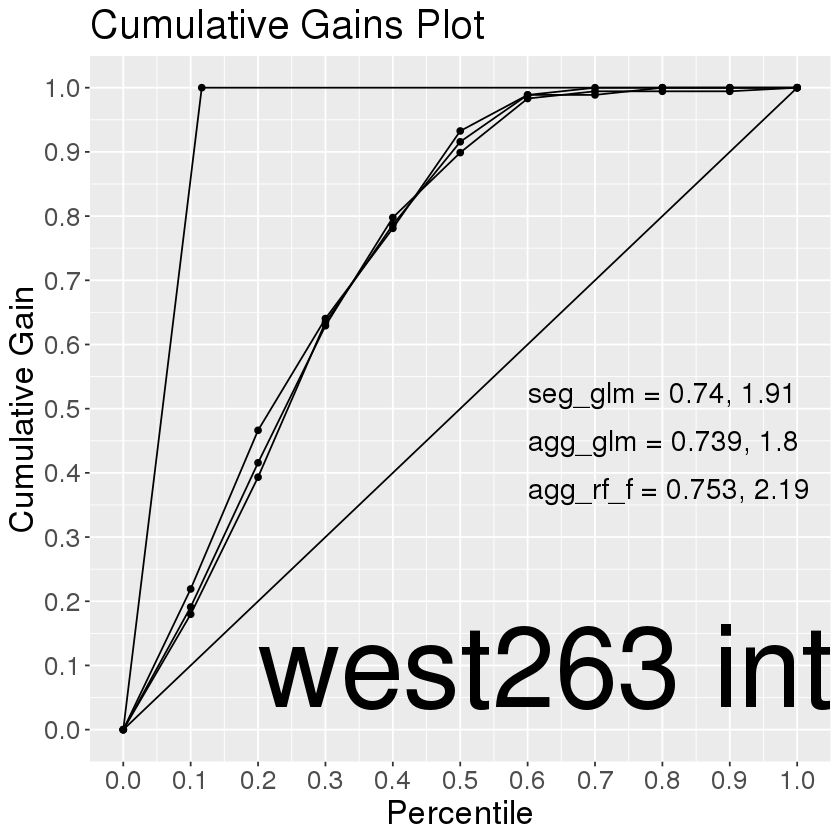

In [168]:
idx=4
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


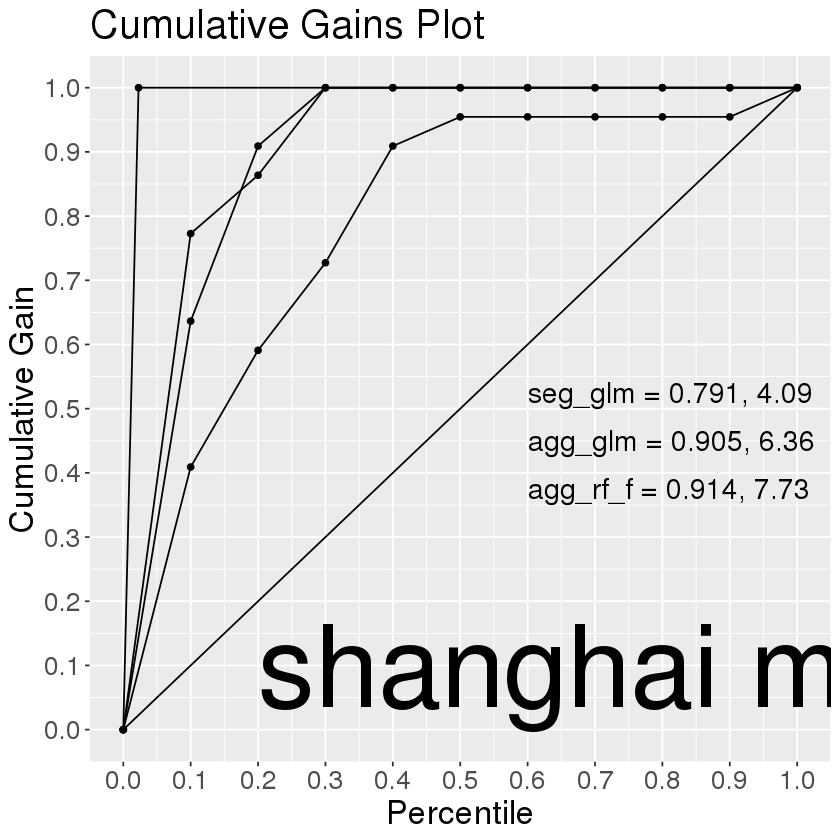

In [169]:
idx=5
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


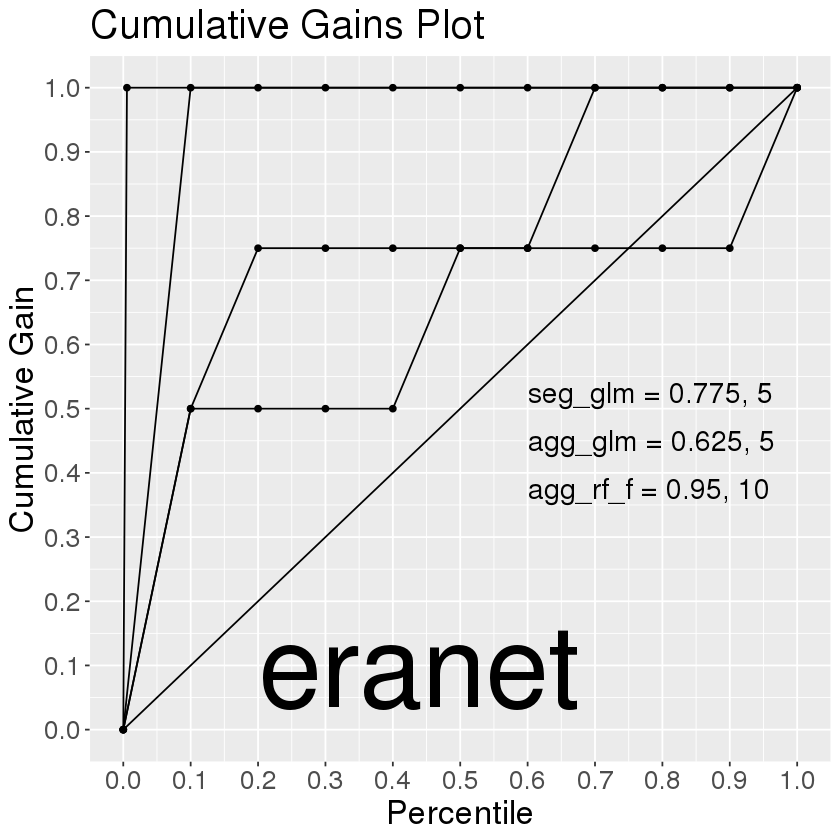

In [170]:
idx=6
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 


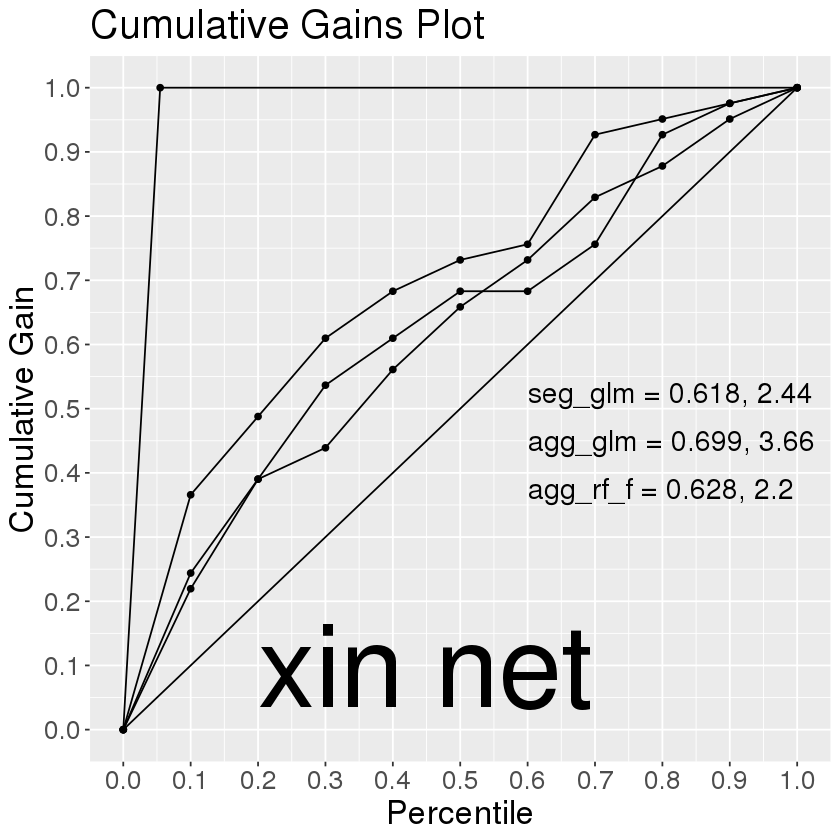

In [171]:
idx=8
i=resellers_China_idx[idx]
reseller_str = resellers_China[idx]
expiry_train_df_1_sub = expiry_train_df_1 %>% filter(reseller==reseller_str)
prop_positive = prop.table(table(expiry_train_df_1_sub$renewal_status))[[2]]

plot_multigains_res(
lift_df_list=list(
    seg_glm = reseller_compare_list_01_50[[i]][['lift_df_seg_glm']],
    agg_glm = reseller_compare_list_01_50[[i]][['lift_df_agg_glm']],
    agg_rf_f = reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']]),
auc_list = list(
    seg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_seg_glm']]),
    agg_glm = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_agg_glm']]),
    agg_rf_f = calc_auc(reseller_compare_list_01_50[[i]][['lift_df_ranger_03_fact']])),
prop_positive = prop_positive,
reseller_str = reseller_str) 
